Nisansala Wickramasinghe - wmw190000

Mananage Sanjaya Kumara - mmk190004

In [ ]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LSTM
from keras.utils import normalize
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [ ]:
class DNN_Image_Classification:
  def __init__(self, x_train, y_train, x_test, y_test):
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test

  def visualize(self):
    indexes = np.random.randint(0, self.x_train.shape[0], size=9)
    images = self.x_train[indexes]
    labels = self.y_train[indexes]

    # plot the 9 mnist digits
    plt.figure(figsize=(3,3))

    for i in range(len(indexes)):
      plt.subplot(3, 3, i + 1)
      image = images[i]
      plt.imshow(image, cmap='gray')
      #plt.axis('off')

  def preprocessing(self):
    x_train = self.x_train.reshape(self.x_train.shape[0], 28, 28, 1)
    x_test = self.x_test.reshape(self.x_test.shape[0], 28, 28, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # normalize data
    self.x_train = normalize(x_train, axis = 1)
    self.x_test = normalize(x_test, axis = 1)
    #self.y_train = np_utils.to_categorical(self.y_train)

  def DNN_from_scrach(self):
    self.X = np.array([[1, 0], [1, 1], [0, 0],[1, 1],[0, 1],[1,0]])
    self.y = np.array([[1], [1], [0], [1], [0], [1]])

    X = self.X.T
    y = self.y.T

    inputLayer_neurons = X.shape[0]  # number of features in data set
    hiddenLayer_neurons1 = 2  # number of hidden layers neurons
    hiddenLayer_neurons2 = 1
    outputLayer_neurons = y.shape[0]  # number of neurons at output layer

    Wh1 = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons1))
    Bh1 = np.random.rand(1, hiddenLayer_neurons1) 
    Wh2 = np.random.uniform(size=(hiddenLayer_neurons1, hiddenLayer_neurons2))
    Bh2 = np.random.rand(1, hiddenLayer_neurons2) 
    Wout = np.random.uniform(size=(hiddenLayer_neurons2, outputLayer_neurons))
    Bout = np.random.rand(1, outputLayer_neurons) 

    lr = 0.1
    epochs = 100

    def sigmoid(x):
      return 1 / (1 + np.exp(-x))

    def forward_prop(data, weights, bias):
      Z = np.dot(weights.T,data) + bias.T
      A = sigmoid(Z)
      return A

    def MSE(y, output):
      MSE = np.square(y - output) / 2
      return MSE

    def output_prime(y, output):
      return -(y - output)

    def activation_prime(x):
      return np.multiply(x, (1 - x))

    def output_layer_back(y, Aout, Wout, Bout, Ah2, lr):
      dE_dZ = output_prime(y, Aout) * activation_prime(Aout)
      dE_dWout = np.dot(Ah2,(dE_dZ).T)
      dE_dBout = np.dot(np.ones((1,dE_dZ.shape[1])),(dE_dZ).T)
      Wout = Wout - lr * dE_dWout
      Bout = Bout - lr * dE_dBout
      return Wout, Bout

    def hidden_layer2_back(y, Wout, Aout, Wh2, Bh2, Ah2, Ah1, lr):
      dE_dZ = activation_prime(Ah2) * np.dot(Wout,(output_prime(y, Aout) * activation_prime(Aout)))
      dE_dWh2 = np.dot(Ah1,(dE_dZ).T)
      dE_dBh2 = np.dot(np.ones((1,dE_dZ.shape[1])) ,(dE_dZ).T)
      Wh2 = Wh2 - lr * dE_dWh2
      Bh2 = Bh2 - lr * dE_dBh2
      return Wh2, Bh2

    def hidden_layer1_back(y, Wout, Aout, Wh2, Ah2, Ah1, X, Wh1, Bh1, lr):
      dE_dZ = activation_prime(Ah1) * np.dot(Wh2, activation_prime(Ah2) * np.dot(Wout, (output_prime(y, Aout) * activation_prime(Aout))))
      dE_dWh1 = np.dot(X, (dE_dZ).T)
      dE_dBh1 = np.dot(np.ones((1,dE_dZ.shape[1])) ,(dE_dZ).T)
      Wh1 = Wh1 - lr * dE_dWh1
      Bh1 = Bh1 - lr * dE_dBh1
      return Wh1, Bh1

    losses = []
    for epoch in range(epochs):
      Ah1 = forward_prop(X, Wh1, Bh1)
      Ah2 = forward_prop(Ah1, Wh2, Bh2)
      Aout = forward_prop(Ah2, Wout, Bout)

      error = MSE(y, Aout)

      output = output_layer_back(y, Aout, Wout, Bout, Ah2, lr)
      Wout = output[0]
      Bout = output[1]
      hidden_2 = hidden_layer2_back(y, Wout, Aout, Wh2, Bh2, Ah2, Ah1, lr)
      Wh2 = hidden_2[0]
      Bh2 = hidden_2[1]
      hidden_1 = hidden_layer1_back(y, Wout, Aout, Wh2, Ah2, Ah1, X, Wh1, Bh1, lr)
      Wh1 = hidden_1[0]
      Bh1 = hidden_1[1]

      # print error at every 100th epoch
      epoch_loss = np.average(error)
      if epoch % 10 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

      # appending the error of each epoch
      losses.append(epoch_loss)

    xpoints = np.arange(0,100)
    ypoints = losses
    plt.plot(xpoints, ypoints)
    plt.title('Training loss for DNN from scrach | 100 epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


  def DNN_using_lib(self):
    def train_NN(xtest, xtrain, ytest, ytrain, active_fun1, l_rate, max_it, h_layers):
      if h_layers == 2:
        model = Sequential()
        model.add(Flatten())  # input layer
        model.add(Dense(128, activation = active_fun1))
        model.add(Dense(10, activation = active_fun1))

      if h_layers == 3:
        model = Sequential()
        model.add(Flatten())  # input layer
        model.add(Dense(256, activation = active_fun1))
        model.add(Dense(128, activation = active_fun1))
        model.add(Dense(10, activation = active_fun1))

      model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=l_rate), 
                      loss= "sparse_categorical_crossentropy", 
                      metrics=["accuracy"])
      
      model_out = model.fit(xtrain,ytrain, epochs=max_it, validation_data=(xtest, ytest), verbose=0)
      train_loss, train_acc = model.evaluate(xtrain, ytrain, verbose=0)
      test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)
      history_list = [model_out.history['loss'],model_out.history['val_loss'],model_out.history['accuracy'],model_out.history['val_accuracy'],train_acc, train_loss, test_acc, test_loss]
      return history_list

    mod1 = train_NN(self.x_test, self.x_train, self.y_test, self.y_train, active_fun1 = 'sigmoid' , l_rate = 0.1 , max_it = 50 , h_layers = 2)
    mod2 = train_NN(self.x_test, self.x_train, self.y_test, self.y_train, active_fun1 = 'sigmoid' , l_rate = 0.1 , max_it = 50 , h_layers = 3)
    mod3 = train_NN(self.x_test, self.x_train, self.y_test, self.y_train, active_fun1 = 'sigmoid' , l_rate = 0.01 , max_it = 50 , h_layers = 2)
    mod4 = train_NN(self.x_test, self.x_train, self.y_test, self.y_train, active_fun1 = 'sigmoid' , l_rate = 0.01 , max_it = 50 , h_layers = 3)

    #Ploting Training Accuracy and loss vs epochs for each model 
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.8,)
    fig.suptitle('Training data')

    epochs = range(1,51)
    axs[0].plot(epochs, mod1[0],'g', label='sigmoid,0.1,50,[128,10]')
    axs[0].plot(epochs, mod3[0],'r', label='sigmoid,0.01,50,[128,10]')
    axs[0].plot(epochs, mod4[0],'y', label='sigmoid,0.01,50,[256,128,10]')
    axs[0].set_title('Training loss vs epoch', size=8)
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    axs[1].plot(epochs, mod1[2],'g', label='sigmoid,0.1,50,[128,10]')
    axs[1].plot(epochs, mod3[2],'r', label='sigmoid,0.01,50,[128,10]')
    axs[1].plot(epochs, mod4[2],'y', label='sigmoid,0.01,50,[256,128,10]')
    axs[1].set_title('Training Accuracy vs epoch', size=8)
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #Ploting Testing Accuracy and loss vs epochs for each model 
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.8,)
    fig.suptitle('Test data')

    epochs = range(1,51)
    axs[0].plot(epochs, mod1[1],'g', label='sigmoid,0.1,50,[128,10]')
    axs[0].plot(epochs, mod3[1],'r', label='sigmoid,0.01,50,[128,10]')
    axs[0].plot(epochs, mod4[1],'y', label='sigmoid,0.01,50,[256,128,10]')
    axs[0].set_title('Testing loss vs epoch', size=8)
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    axs[1].plot(epochs, mod1[3],'g', label='sigmoid,0.1,50,[128,10]')
    axs[1].plot(epochs, mod3[3],'r', label='sigmoid,0.01,50,[128,10]')
    axs[1].plot(epochs, mod4[3],'y', label='sigmoid,0.01,50,[256,128,10]')
    axs[1].set_title('Testing Accuracy vs epoch', size=8)
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    data = {'model': [1,2,3],
        'act': ['Sigmoid','Sigmoid','Sigmoid'],
        'l_rate': [0.1, 0.1, 0.01],
        'h_layers': [1, 2, 1],
        'max_iter': [ 100, 100, 100],
        'train acc': [mod1[4],mod3[4],mod4[4]],
        'train loss': [mod1[5],mod3[5],mod4[5]],
        'test acc': [mod1[6],mod3[6],mod4[6]],
        'test loss': [mod1[7],mod3[7],mod4[7]]}

    df = pd.DataFrame(data)
    print("Model History \n \n", df.to_markdown(index=False), "\n")

    

Error at epoch 0 is 0.11454
Error at epoch 10 is 0.11259
Error at epoch 20 is 0.11164
Error at epoch 30 is 0.11122
Error at epoch 40 is 0.11105
Error at epoch 50 is 0.11099
Error at epoch 60 is 0.11096
Error at epoch 70 is 0.11095
Error at epoch 80 is 0.11094
Error at epoch 90 is 0.11094


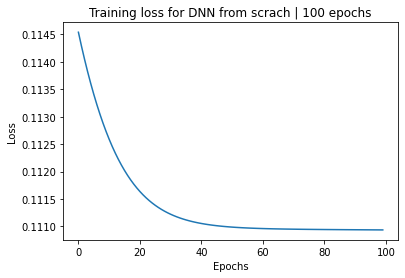

Model History 
 
 |   model | act     |   l_rate |   h_layers |   max_iter |   train acc |   train loss |   test acc |   test loss |
|--------:|:--------|---------:|-----------:|-----------:|------------:|-------------:|-----------:|------------:|
|       1 | Sigmoid |     0.1  |          1 |        100 |    0.945617 |   0.257323   |     0.9381 |    0.340695 |
|       2 | Sigmoid |     0.1  |          2 |        100 |    0.998267 |   0.00546702 |     0.9734 |    0.245108 |
|       3 | Sigmoid |     0.01 |          1 |        100 |    0.995567 |   0.0147639  |     0.9734 |    0.190667 | 



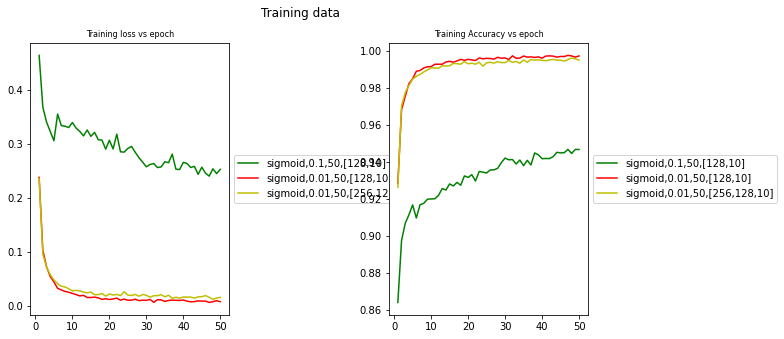

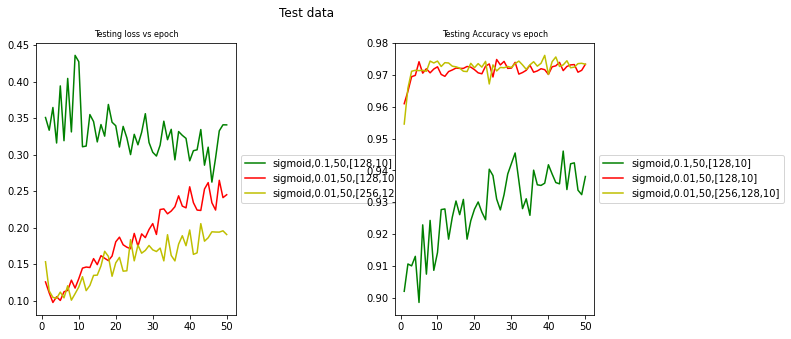

In [ ]:
mnist = tf.keras.datasets.mnist  # 28 x 28 images of 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if __name__ == "__main__":
    dnn1 = DNN_Image_Classification(x_train, y_train, x_test, y_test)
    #dnn1.visualize()
    dnn1.preprocessing()
    dnn1.DNN_from_scrach()
    dnn1.DNN_using_lib()